### IMPORTING LIBRARIES

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [3]:
df = pd.read_csv("datafile (1).csv")
df

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [6]:
dataset = df.copy()

### ABOUT THE DATASET

In [7]:
print("no of rows and columns: ",df.shape)

no of rows and columns:  (49, 6)


In [8]:
print("number of elements: ",df.size)

number of elements:  294


In [9]:
df.columns


Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

Crop production in India: Geographically, India is a diverse country and hence type of crop produced differs the change of soil. 

**FEATURES :**


### MISSING VALUES AND DUPLICATES

In [10]:
df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

- there is no null values in the dataset

In [11]:
df.duplicated().any()


False

- false means there doesn't exist any duplicate values

### EXPLORING DATA

In [12]:
df.dtypes

Crop                                      object
State                                     object
Cost of Cultivation (`/Hectare) A2+FL    float64
Cost of Cultivation (`/Hectare) C2       float64
Cost of Production (`/Quintal) C2        float64
Yield (Quintal/ Hectare)                 float64
dtype: object

### DESCRIPTIVE ANALYSIS

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost of Cultivation (`/Hectare) A2+FL,49.0,20363.537347,13561.435306,5483.54,12774.41,17022.00,24731.06,66335.06
Cost of Cultivation (`/Hectare) C2,49.0,31364.666735,20095.783569,7868.64,19259.84,25909.05,35423.48,91442.63
Cost of Production (`/Quintal) C2,49.0,1620.537755,1104.990472,85.79,732.62,1595.56,2228.97,5777.48
Yield (Quintal/ Hectare),49.0,98.086735,245.293123,1.32,9.59,13.70,36.61,1015.45


- count is 49 represents that there is no null values


###### Which crop has the highest yield?

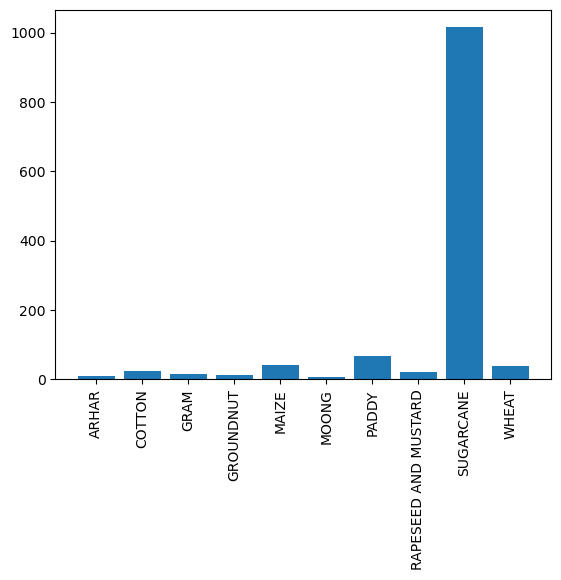

In [20]:
x=df["Yield (Quintal/ Hectare) "]
y = df ["Crop"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show() 

- sugarcane have the highest yield

###### Which state has the highest share of agriculture?

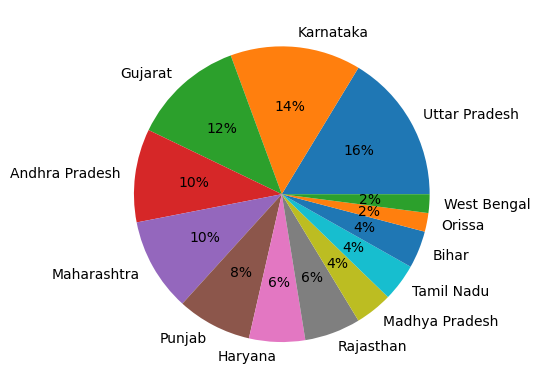

In [23]:
plt.pie(df["State"].value_counts(),autopct="%.f%%", labels=df["State"].unique())
plt.show()     

- Uttar Pradesh has the highest share of agriculture

###### Compare yield and cost of production cropwise.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


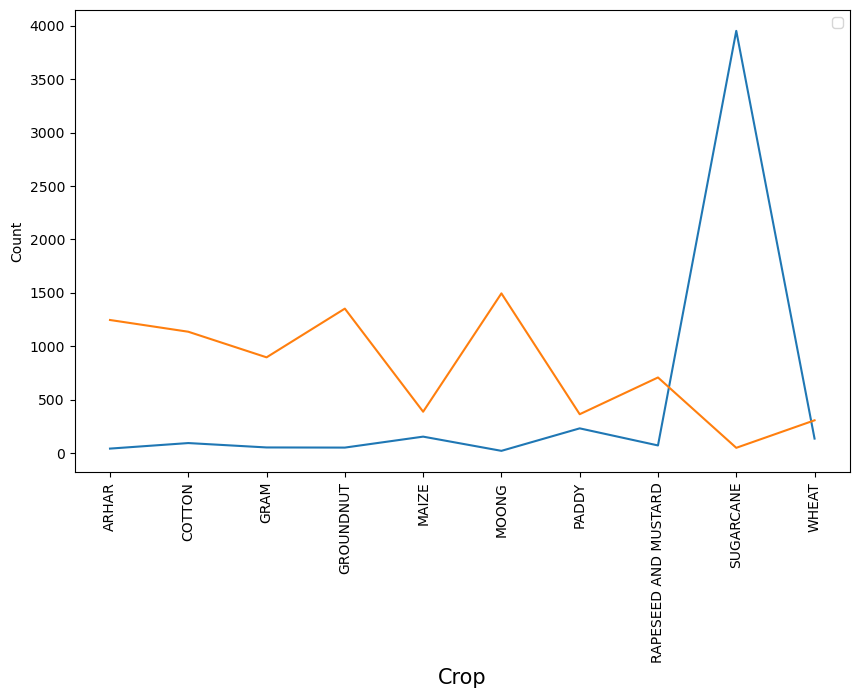

In [24]:
fig,axs = plt.subplots(figsize=(10,6))
crop_wise_yield = df.groupby(['Crop']).sum()['Yield (Quintal/ Hectare) ']
plt.plot(crop_wise_yield)
crop_wise_production = df.groupby(['Crop']).sum()['Cost of Production (`/Quintal) C2']/10
plt.plot(crop_wise_production)
plt.ylabel('Count')
plt.xlabel('Crop', fontsize=15)
plt.xticks(rotation ='vertical')
plt.legend()
plt.show()

- cost of production is 10 times 
- maximum yield/hectare is of Sugarcane
- sugarcane has low cost of production/quintal 

###### Compare cost of production and cost of cultivation statewise

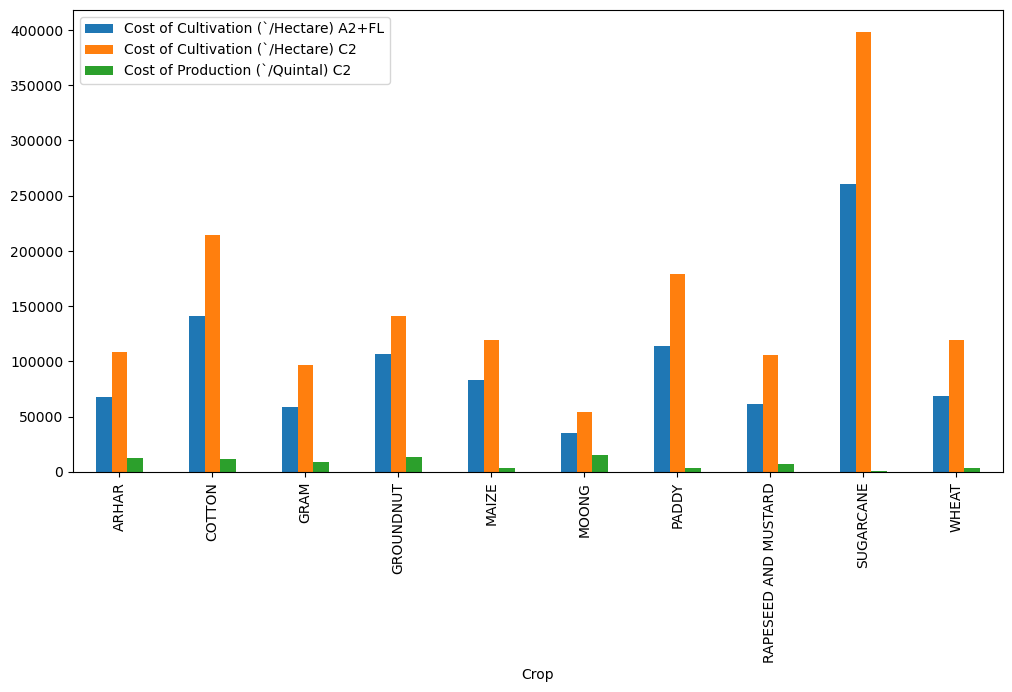

In [25]:
cols = df.columns
df.groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));

###### What are the Top 3 states with highest yield?

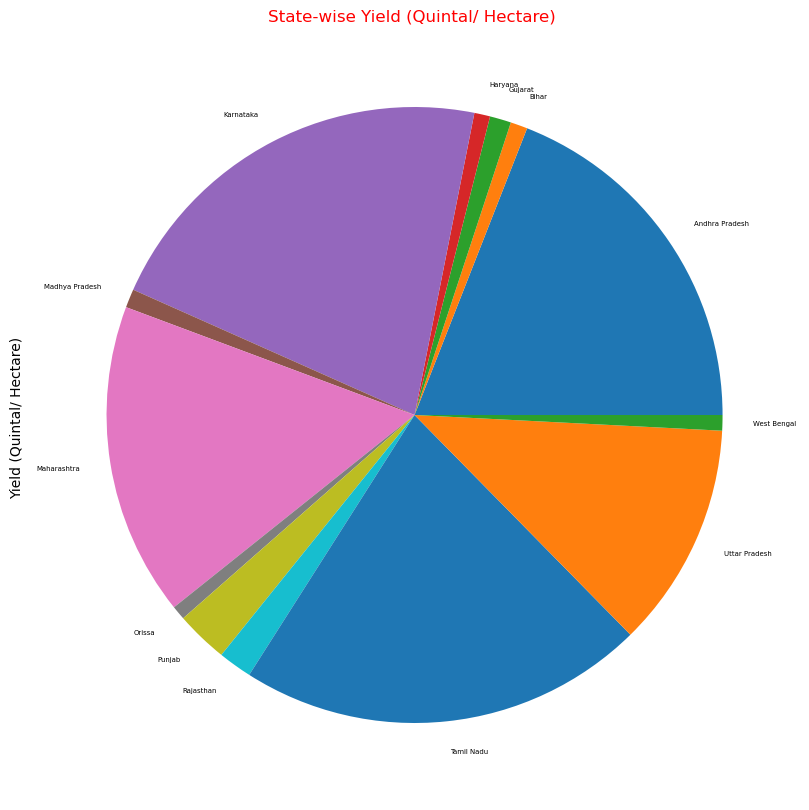

In [26]:
df.groupby('State')[cols[-1]].sum().plot(kind='pie', figsize=(10,10), fontsize=5)
plt.title('State-wise '+cols[-1], color='red', fontsize=12)
plt.show()           

- Karnataka marks the highest yield followed by Tamil Nadu & Andhra Pradesh

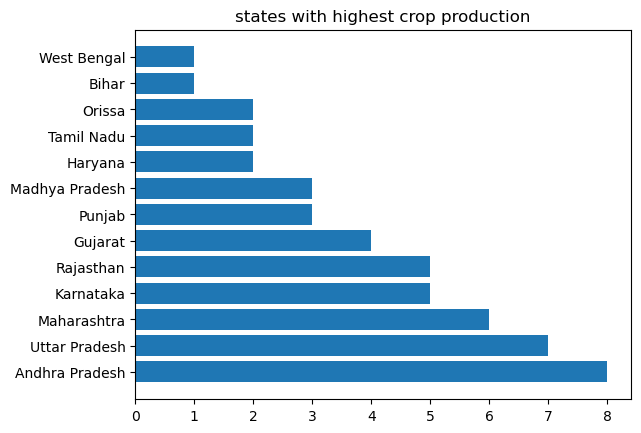

In [28]:
plt.title('states with highest crop production')
a=df['State'].value_counts()
plt.barh(a.index, a.values)
plt.show()

- Andra Pradesh produces more crops followed by Uttar Pradesh & Maharashtra

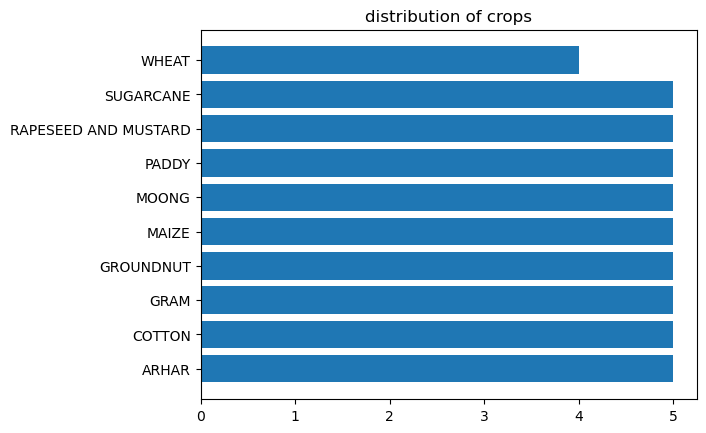

In [31]:
plt.title('distribution of crops')
b=df["Crop"].value_counts()
plt.barh(b.index, b.values)
plt.show()

**CONCLUSIONS :**
- sugarcane have the highest yield
- Uttar Pradesh has the highest share of agriculture
- cost of production is 10 times 
- maximum yield/hectare is of Sugarcane
- sugarcane has low cost of production/quintal 
- Karnataka marks the highest yield followed by Tamil Nadu & Andhra Pradesh
- Andra Pradesh produces more crops followed by Uttar Pradesh & Maharashtra